In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
import os
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('five_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

area_sqft                  0
bedrooms                   0
bathrooms                  0
age_years                  0
distance_city_center_km    0
price_lakhs                0
dtype: int64
['area_sqft', 'bedrooms', 'bathrooms', 'age_years', 'distance_city_center_km', 'price_lakhs']


In [19]:
x = df[['area_sqft', 'bedrooms', 'bathrooms', 'age_years', 'distance_city_center_km']].values.reshape(-1,5)
y = df['price_lakhs'].values.reshape(-1,1)

sc = MinMaxScaler()
x = sc.fit_transform(x)
yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)
jb.dump(sc, 'scaler_five.pkl')

['scaler_five.pkl']

In [20]:
def price(area,bedrooms,bathrooms,age,distance):
    inp = np.array([[area, bedrooms, bathrooms, age, distance]])
    sc = jb.load('scaler_five.pkl')
    inp = sc.transform(inp)
    model_path = 'five.keras'
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(5,), activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x, y, epochs=200)
        lv = hist.history['loss']
        model.save('five.keras')
        pred = model.predict(x)
        
        plt.figure()
        plt.plot(lv)
        plt.title('Loss Values')
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.title('Actual vs predicted')
        plt.scatter(y, pred, label= 'actual vs predicted', color='pink')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.grid(True)
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx - yn)+yn

c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2723
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2072
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1651
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1415
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1076
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0879
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0617
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0511
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0347
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0293
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0240
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0181
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0193
Epoch 16/200
4/4 ━━

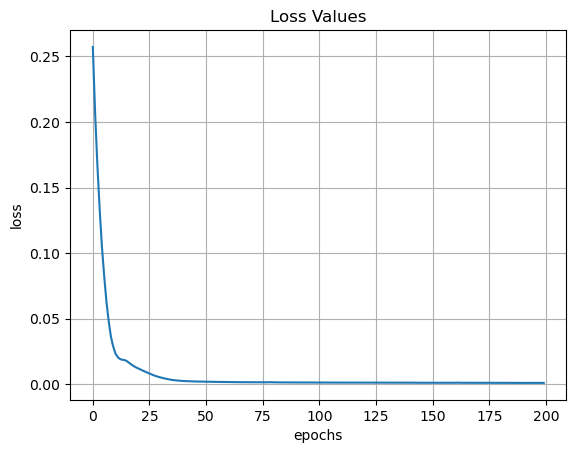

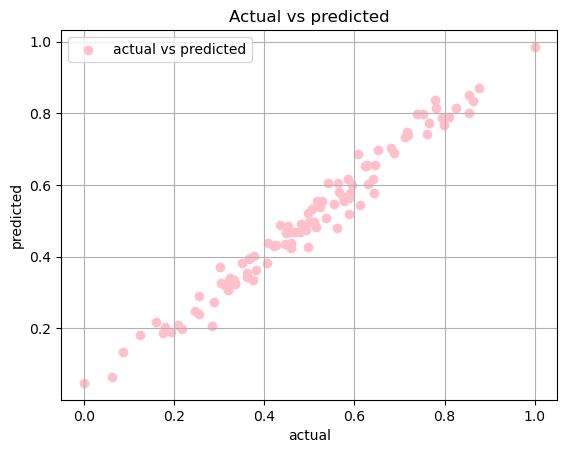

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
126.76824757978724


In [21]:
print(price(2020,3, 3, 7, 12))